## Importing required libraries

In [1]:
# Importing required libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

## Creating sample DataFrame and Train-Test split

In [2]:
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

In [3]:
len(X_train)

7500

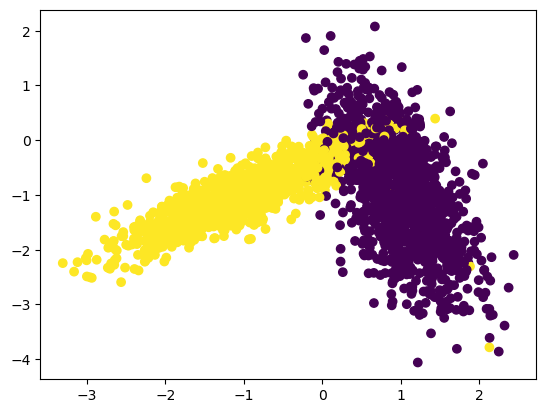

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [5]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
from sklearn.metrics import accuracy_score

def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    """
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    """
    trainscores = []
    testscores  = []
    generated_num=set()    # creating set to store 10 unique values
    while len(generated_num)<=9:
        num=np.random.random_integers(param_range[0],param_range[1])#creating descrete uniform numbers from given range- numpy.org
        generated_num.add(num)
    generated_num=sorted(list(generated_num))    # sorting the list in ascending order
    params={}      # creating dictionary to add n_neighbors
    params['n_neighbors']=generated_num       # adding n_neigbors as key and list of generated numbers as value
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        # here we will select the train and test data, by dividing the X_train data into 3 equal parts and using k-fold technique
        for j in range(folds-1,-1,-1):    #in reverse order(2,1,0)
            l=j*int(len(x_train)/folds)   # generating lower limit of the range
            h=l+int(len(x_train)/folds)   # generating upper limit of the range
            
            test_indices = list(range(l,h))
            train_indices  = list(set(list(range(len(x_train)))) - set(test_indices))

            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.08it/s]


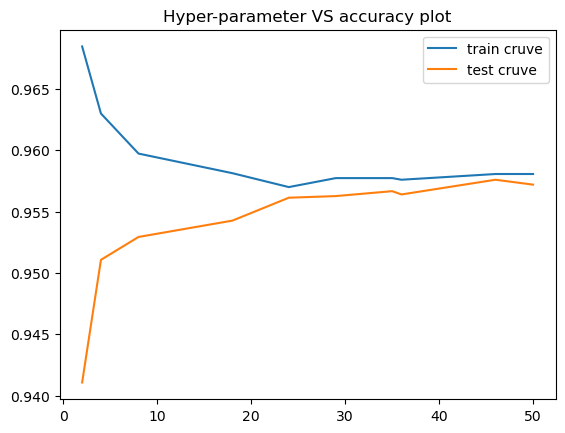

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


classifier = KNeighborsClassifier()

param_range=(1,50)    # we are giving the range from which we will select 10 random 'k' values

folds = 3  

trainscores,testscores,params = RandomSearchCV(X_train, y_train, classifier, param_range, folds)
 

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

* From graph of accuracy, at k=33(approx) train and test accuracy is high as there is too little gap. Therefore k=33

In [7]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

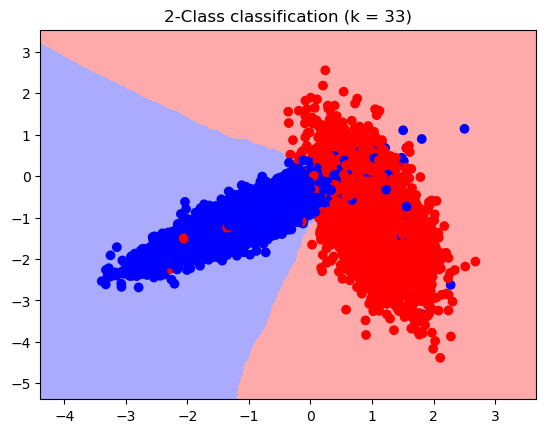

In [8]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 33)   # k selected from function RandomSearchCV()
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)